# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import GSFCDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

In [6]:
dataset_config = {
    "data_dir": "/home/dragik/data/GSFC/old_labels",
    "selection":"rgb"
}

dataset = GSFCDataset(dataset_config)

Total number of patches: 27


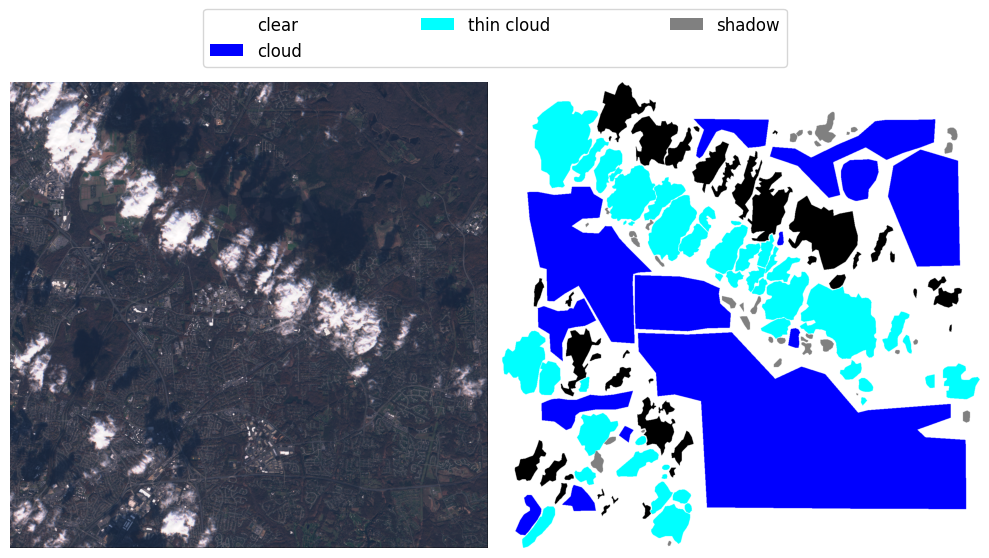

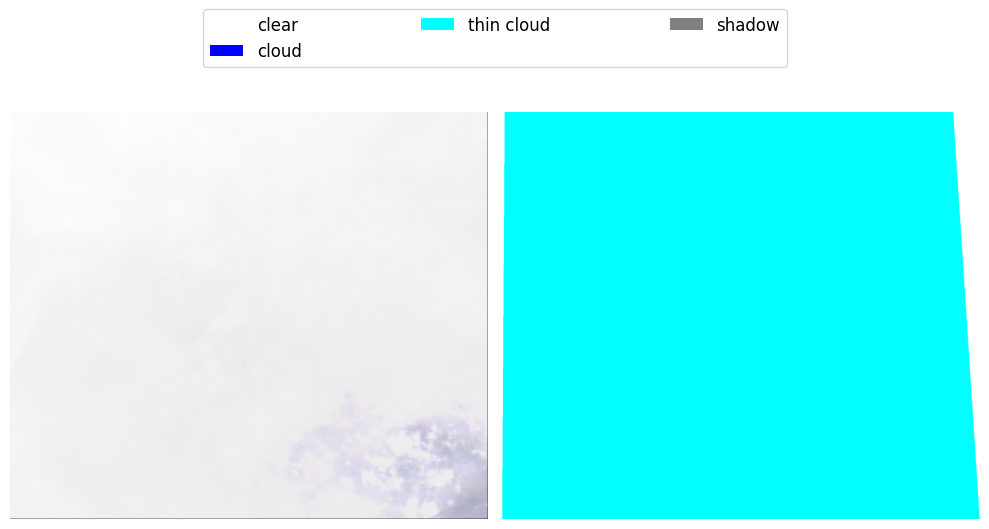

In [7]:
print(f"Total number of patches: {len(dataset)}")
dataset.show_image(8);
dataset.show_image(13);

In [8]:
dataset.data_distribution_table()

,Number of pixels
clear,12517407.0
cloud,17785609.0
thin cloud,21076090.0
shadow,6774723.0


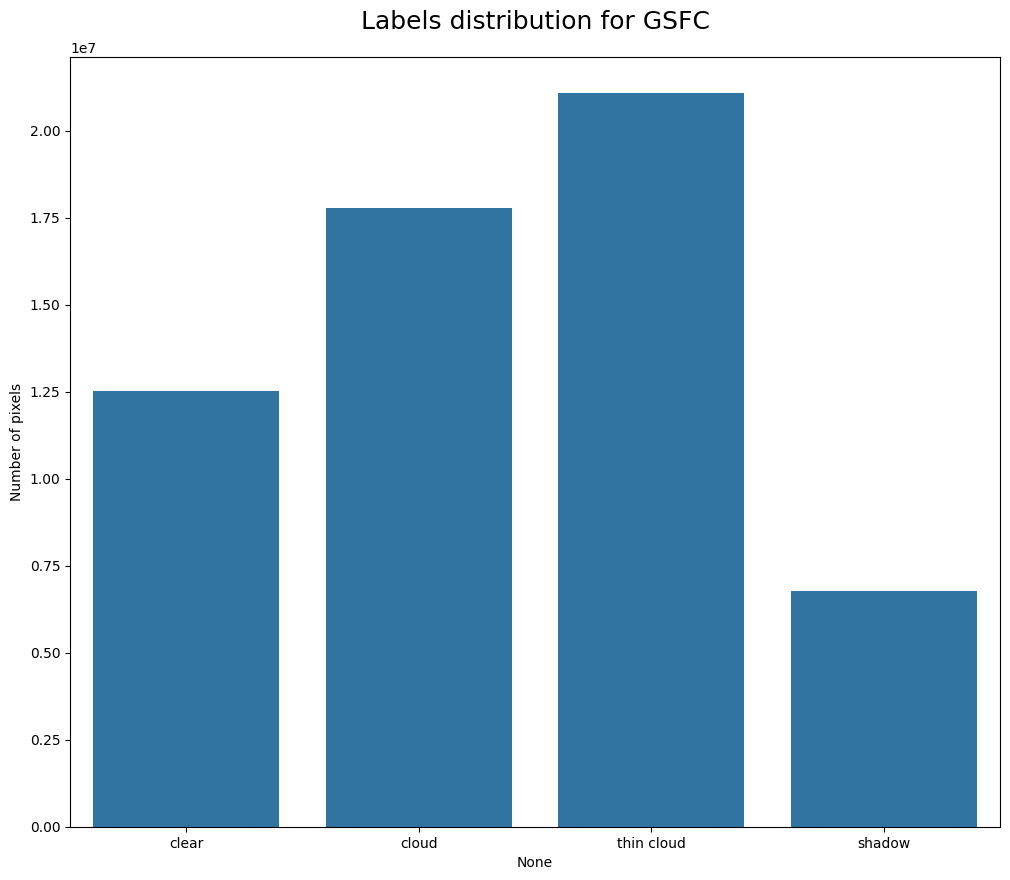

In [9]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [10]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/GSFC/old_labels",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = GSFCDataset(train_dataset_config)
len(train_dataset)

27

## Create the model

In [11]:
epochs = 5
model_directory = "/home/dragik/data/GSFC/old_labels/experiments"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [12]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.12s/it]

epoch: 1, time: 8, loss:  0.64714



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]

IOU:0.4445115891759491, IOU mean:0.4119231528027181, IOU per Class:[0.25069206 0.60701704 0.54725686 0.24272666]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]

epoch: 2, time: 6, loss:  0.59893



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]

IOU:0.5566893325380766, IOU mean:0.47859112521242914, IOU per Class:[0.18874975 0.74234828 0.68945589 0.29381058]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.42it/s]

epoch: 3, time: 5, loss:  0.55638



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.51it/s]

IOU:0.571587757358941, IOU mean:0.47934825880259624, IOU per Class:[0.23202435 0.71844775 0.71123251 0.25568842]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.45it/s]

epoch: 4, time: 4, loss:  0.55432



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]

IOU:0.5153207109872283, IOU mean:0.4807840818044066, IOU per Class:[0.23225205 0.71685741 0.81355572 0.16047116]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.49it/s]

epoch: 5, time: 5, loss:  0.50581



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.60it/s]

IOU:0.6392937628968173, IOU mean:0.5735656922588216, IOU per Class:[0.34008606 0.70721974 0.81995232 0.42700464]


Train loss: [0.6088248447135642, 0.5282838587407712, 0.49116775062349105, 0.48385490090758715, 0.46099188592698837]
Validation loss: []
Train time per epochs: [8, 6, 5, 4, 5]
Finished training. training time: 28


# Working with the 13 bands of Sentinel-2

## Load training data

In [13]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/GSFC/old_labels",    
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = GSFCDataset(train_dataset_config)
len(train_dataset)

27

## Create the model

In [14]:
epochs = 5
model_directory = "/home/dragik/data/GSFC/old_labels/experiments_all_bands"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [15]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.39s/it]

epoch: 1, time: 17, loss:  0.59161



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]

IOU:0.2581065986040128, IOU mean:0.1448246834101175, IOU per Class:[1.87273356e-01 8.57490177e-05 3.89765747e-01 2.17388195e-03]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:22<00:00,  3.15s/it]

epoch: 2, time: 22, loss:  0.52797



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:20<00:00,  2.89s/it]

IOU:0.2591539796226824, IOU mean:0.14024977018909035, IOU per Class:[0.17218987 0.         0.38835361 0.0004556 ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]

epoch: 3, time: 16, loss:  0.46803



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]

IOU:0.26344274469452106, IOU mean:0.14664167581941803, IOU per Class:[0.19281152 0.         0.39327027 0.00048491]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]

epoch: 4, time: 16, loss:  0.46854



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:22<00:00,  3.17s/it]

IOU:0.2630794258340119, IOU mean:0.15000179441139888, IOU per Class:[0.20374376 0.         0.39626342 0.        ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.54s/it]

epoch: 5, time: 24, loss:  0.48388



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:21<00:00,  3.03s/it]

IOU:0.2564897236411759, IOU mean:0.15689466117831655, IOU per Class:[0.20145302 0.0139111  0.40680407 0.00541045]


Train loss: [0.6616621657654091, 0.6332912709977891, 0.6043045432479294, 0.6021068581828365, 0.5992830329471164]
Validation loss: []
Train time per epochs: [17, 22, 16, 16, 24]
Finished training. training time: 95
